<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/5_52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util

In [2]:
import whit_phys_util as buc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
repo = buc.local_repository("https://github.com/jhildebrand22/HW-PS353")

Repository exists at this location. Pulling changes from GitHub.


# Problem 5.52

Repeat example 5.5 with $\beta = 0.1$. 

Calculate the first six Fourier coefficients $A_n$ for the long term motion of the oscillator. Try at $\tau = \tau_0, \tau = 1.5\tau_0,\tau = 2.0\tau_0, \tau = 2.5\tau_0$

In [4]:
tau_0 = 1
omega_0 = 2*np.pi
beta = 0.1
delta_tau = 0.25
f_max = 1

In [5]:
def f_0(tau):
  return (f_max*delta_tau)/tau

In [6]:
def f_n(n,tau):
  return ((2*f_max)/(np.pi*n))*np.sin((np.pi*n*delta_tau)/(tau))

In [7]:
def Amp_n(n,omega):
    return (f_n(n,2*np.pi/omega))/np.sqrt((((omega_0**2) - (n**2)*(omega**2))**2) + 4*(beta**2)*(n**2)*(omega**2))

In [8]:
def phase(n,omega):
  if (omega_0**2 - n**2*omega**2) == 0:
    return (np.pi/2)
  else:
    return np.arctan((2*beta*n*omega)/(omega_0**2 - n**2*omega**2))

In [9]:
def x_t(c,t,tau):
  y = []
  for n in range(6):
    y.append(df.iat[n,c]*np.cos(n*(2*(np.pi/tau)*t - phase(n,(2*np.pi/tau)))))

  return np.sum(y)
    

In [15]:
def cases(tau):
  As = []
  for m in range(6):
    if m == 0:
      As.append((f_0(tau)/omega_0**2))
    else:
      As.append(Amp_n(m,(2*np.pi/tau)))
  return As

In [16]:
df = pd.DataFrame()
df['A Tau_0'] = cases(tau_0)
df['A 1.5*Tau_0'] = cases(1.5*tau_0)
df['A 2.0*Tau_0'] = cases(2.0*tau_0)
df['A 2.5*Tau_0'] = cases(2.5*tau_0)
df

,A Tau_0,A 1.5*Tau_0,A 2.0*Tau_0,A 2.5*Tau_0
0,6.332574e-03,0.004222,0.003166,0.002533
1,3.582245e-01,0.014503,0.008226,0.005932
2,2.687023e-03,0.008964,0.179112,0.013132
3,4.750761e-04,0.001791,0.003970,0.009846
4,3.291276e-20,0.000571,0.001344,0.002456
5,-9.501991e-05,0.000159,0.000567,0.001075


In [17]:
x1 = []
x2 = []
x3 = []
x4 = []

df2 = pd.DataFrame()
df2['Time (s)'] = np.linspace(0,6,200)
for j in df2['Time (s)']:
  x1.append(x_t(0,j,tau_0))
  x2.append(x_t(1,j,1.5*tau_0))
  x3.append(x_t(2,j,2.0*tau_0))
  x4.append(x_t(3,j,2.5*tau_0))

df2['x(t) Tau_0'] = x1
df2['x(t) 1.5*Tau_0'] = x2
df2['x(t) 2.0*Tau_0'] = x3
df2['x(t) 2.5*Tau_0'] = x4

df2

,Time (s),x(t) Tau_0,x(t) 1.5*Tau_0,x(t) 2.0*Tau_0,x(t) 2.5*Tau_0
0,0.000000,0.009397,0.030142,-0.161873,0.034485
1,0.030151,0.076581,0.029279,-0.159193,0.033466
2,0.060302,0.140924,0.027255,-0.150863,0.031326
3,0.090452,0.200175,0.024283,-0.137091,0.028207
4,0.120603,0.252330,0.020655,-0.118243,0.024308
...,...,...,...,...,...
195,5.879397,-0.239831,0.022066,-0.117240,-0.000396
196,5.909548,-0.185197,0.025500,-0.136214,-0.000202
197,5.939698,-0.123899,0.028149,-0.150214,-0.000100
198,5.969849,-0.058238,0.029752,-0.158848,-0.000082


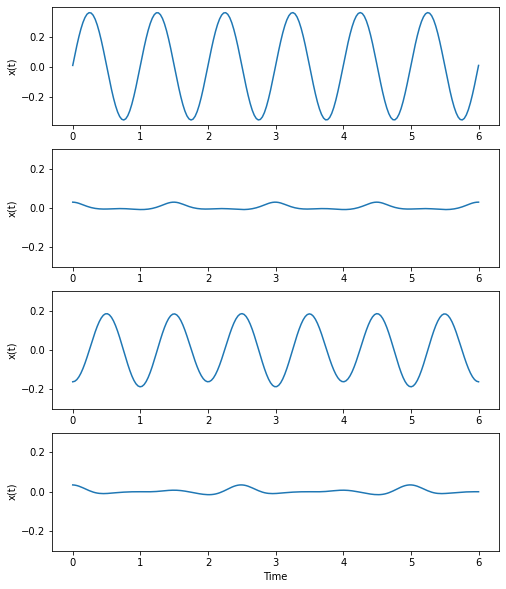

In [18]:
fig, ax = plt.subplots(4, figsize =(8,10))
ax[0].plot(df2['Time (s)'], df2['x(t) Tau_0'])
ax[1].plot(df2['Time (s)'], df2['x(t) 1.5*Tau_0'])
ax[2].plot(df2['Time (s)'], df2['x(t) 2.0*Tau_0'])
ax[3].plot(df2['Time (s)'], df2['x(t) 2.5*Tau_0'])

ax[3].set_xlabel('Time')

ax[0].set_ylabel('x(t)')
ax[1].set_ylabel('x(t)')
ax[2].set_ylabel('x(t)')
ax[3].set_ylabel('x(t)')

ax[1].set_ylim(-.3,.3)
ax[2].set_ylim(-.3,.3)
ax[3].set_ylim(-.3,.3);

Comparison to example:

The problem has less damping than the example, and we see the amplitude of the resonance case is greater than that of the example. The less damping also allows for higher amplitudes in the off-resonance cases, as we see more oscillation or movement in the case where $\beta = 0.1$. 